In [4]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, ElasticNet
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_validate, KFold, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from phik.report import plot_correlation_matrix
from pathlib import Path


In [5]:
data_dir = Path("../../data/processed")

X_train = pd.read_csv(data_dir / "X_train.csv")
X_val = pd.read_csv(data_dir / "X_val.csv")
y_train = pd.read_csv(data_dir / "y_train.csv").squeeze()
y_val = pd.read_csv(data_dir / "y_val.csv").squeeze()
X_test = pd.read_csv(data_dir / "X_test.csv")
test_ids = pd.read_csv(data_dir / "test_ids.csv")['id']

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
# Предсказания на train и validation
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

# Метрики на train
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Метрики на validation
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
mae_val = mean_absolute_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

print("train метрики:")
print(f"   RMSE: {rmse_train:.6f}")
print(f"   MAE: {mae_train:.6f}")
print(f"   R²: {r2_train:.4f}")

print("val метрики:")
print(f"   RMSE: {rmse_val:.6f}")
print(f"   MAE: {mae_val:.6f}")
print(f"   R²: {r2_val:.4f}")

train метрики:
   RMSE: 0.020109
   MAE: 0.015824
   R²: 0.8449
val метрики:
   RMSE: 0.020025
   MAE: 0.015773
   R²: 0.8453


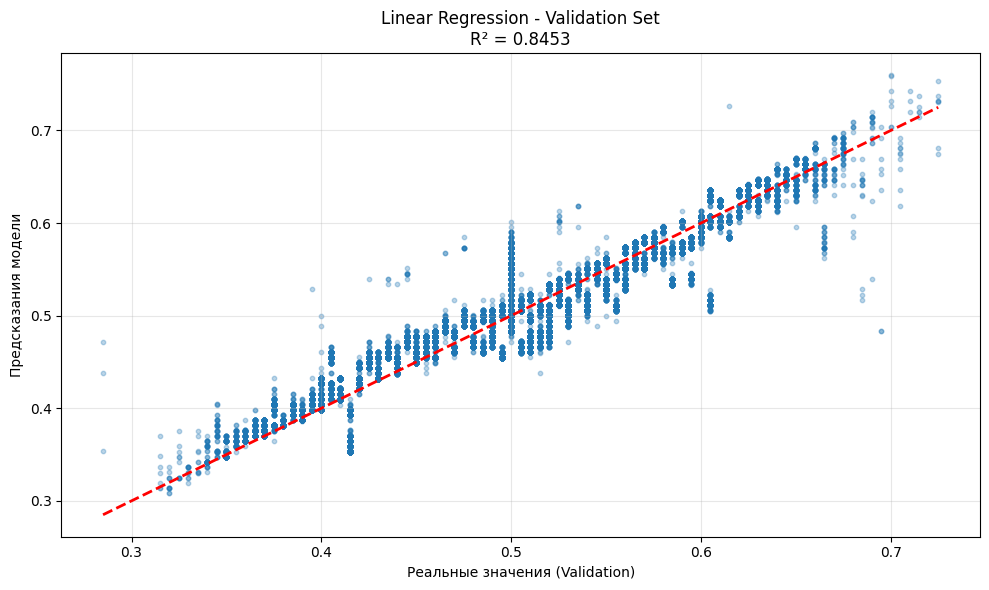

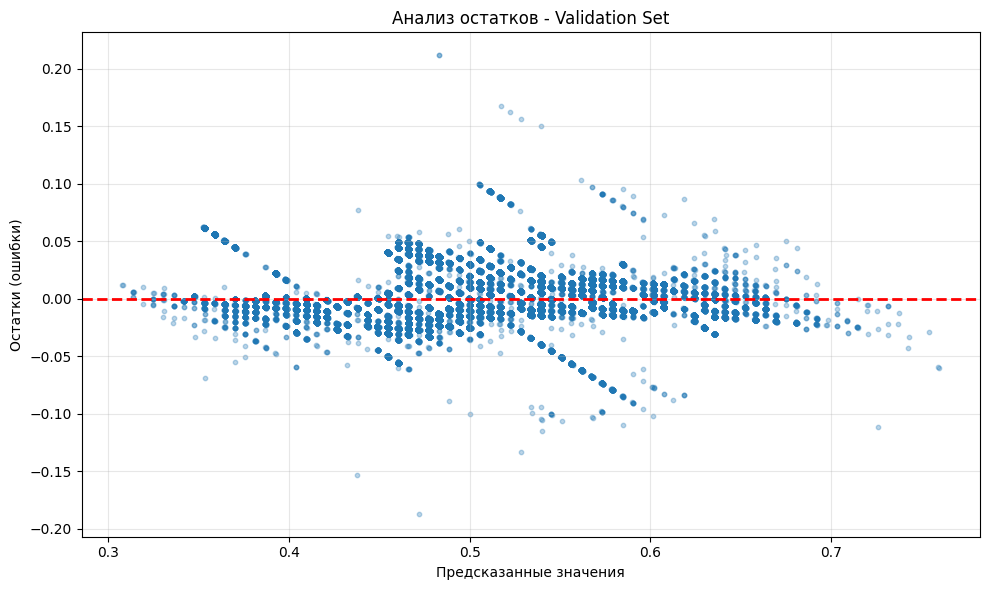

In [8]:
fig_dir = Path("../../reports/figures")
fig_dir.mkdir(parents=True, exist_ok=True)

plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred, alpha=0.3, s=10)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
plt.xlabel('Реальные значения (Validation)')
plt.ylabel('Предсказания модели')
plt.title(f'Linear Regression - Validation Set\nR² = {r2_val:.4f}')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig(fig_dir / "validation_predictions.png", dpi=300, bbox_inches='tight')
plt.show()

residuals = y_val - y_val_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_val_pred, residuals, alpha=0.3, s=10)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Предсказанные значения')
plt.ylabel('Остатки (ошибки)')
plt.title('Анализ остатков - Validation Set')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig(fig_dir / "residuals_analysis.png", dpi=300, bbox_inches='tight')
plt.show()

In [9]:
X_full = pd.concat([X_train, X_val])
y_full = pd.concat([y_train, y_val])

final_model = LinearRegression()
final_model.fit(X_full, y_full)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
y_test_pred = final_model.predict(X_test)

In [11]:
submission = pd.DataFrame({
    'id': test_ids.values,
    'FloodProbability': y_test_pred
})

In [12]:
submission.to_csv('linear_submission.csv', index=False)
submission.to_csv(data_dir / "submission_linear.csv", index=False)

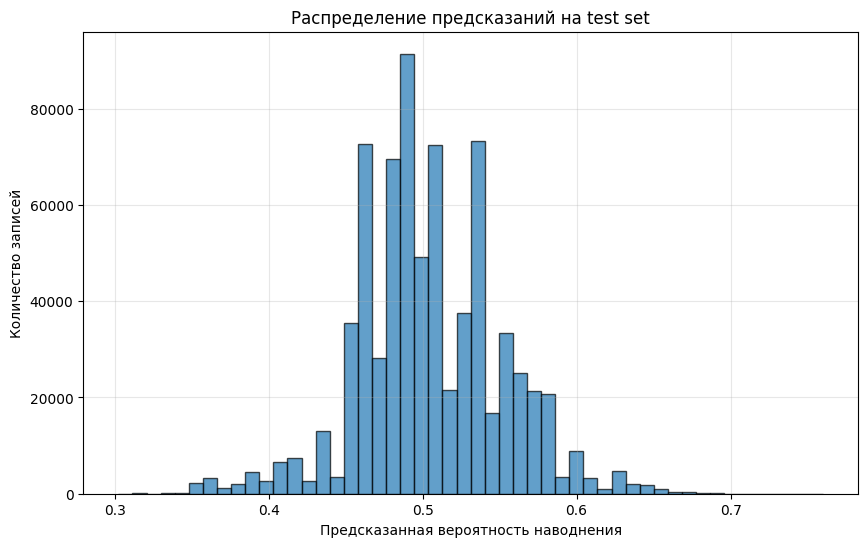

In [13]:
# Какие значения предсказывает модель
plt.figure(figsize=(10, 6))
plt.hist(y_test_pred, bins=50, alpha=0.7, edgecolor='black')
plt.xlabel('Предсказанная вероятность наводнения')
plt.ylabel('Количество записей')
plt.title('Распределение предсказаний на test set')
plt.grid(alpha=0.3)
fig_dir = Path("../../reports/figures")
fig_dir.mkdir(parents=True, exist_ok=True)
plt.savefig(fig_dir / "test_predictions_distribution.png", dpi=300, bbox_inches='tight')
plt.show()